# This project consist in an algorithm for sentiment analysis that I use to classify flight's reviews and automatically understand if they are positive, negative or neutral. I will do a supervised learning classification using this dataset found on kaggle: https://www.kaggle.com/crowdflower/twitter-airline-sentiment/


A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to classify positive, negative, and neutral tweets.

OUR sentiment analysis HELPS company airlines WHO WANT TO analyse feedback from their customers BY avoiding to read all of them AND automatizing this process. (UNLIKE hiring people who read all the comments on the social networks)

**1) Ingesting, exploring and cleaning data for your project**

In [1]:
#I load the dataset:"Tweets" and I check the structure and some infos
import pandas as pd
df= pd.read_csv(r"C:\Users\damia\Documents\UNIVERSITA\Master in Big Data Solutions in Barcelona\CORSI\Data Science Foundations\Final Project DSF Lorenzo Damiani\Tweets.csv")
print(df.head())
print(df.info())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [2]:
#I drop the useless columns, check if the dataset is balanced and how many reviews there are for each airline company
df= df.drop(['tweet_id', 'airline_sentiment_confidence','negativereason', 'negativereason_confidence','airline_sentiment_gold','name', 'negativereason_gold', 'retweet_count', 'tweet_coord','tweet_created', 'tweet_location', 'user_timezone'], axis=1)
print(df)
print(df.airline.unique())
print(df.airline.value_counts())
print(df.airline_sentiment.value_counts())
print("""

      The dataset is unbalanced because we have 9178 negative reviews, 3099 neutral reviews and 2363 positive reviews
      """)

      airline_sentiment         airline  \
0               neutral  Virgin America   
1              positive  Virgin America   
2               neutral  Virgin America   
3              negative  Virgin America   
4              negative  Virgin America   
...                 ...             ...   
14635          positive        American   
14636          negative        American   
14637           neutral        American   
14638          negative        American   
14639           neutral        American   

                                                    text  
0                    @VirginAmerica What @dhepburn said.  
1      @VirginAmerica plus you've added commercials t...  
2      @VirginAmerica I didn't today... Must mean I n...  
3      @VirginAmerica it's really aggressive to blast...  
4      @VirginAmerica and it's a really big bad thing...  
...                                                  ...  
14635  @AmericanAir thank you we got on a different f...  
14636  @Ame

                      text                        
airline_sentiment negative neutral positive    All
airline                                           
American              1960     463      336   2759
Delta                  955     723      544   2222
Southwest             1186     664      570   2420
US Airways            2263     381      269   2913
United                2633     697      492   3822
Virgin America         181     171      152    504
All                   9178    3099     2363  14640
                negative   neutral  positive
airline                                     
Virgin America  0.359127  0.339286  0.301587
Delta           0.429793  0.325383  0.244824
Southwest       0.490083  0.274380  0.235537
United          0.688906  0.182365  0.128728
American        0.710402  0.167814  0.121783
US Airways      0.776862  0.130793  0.092345


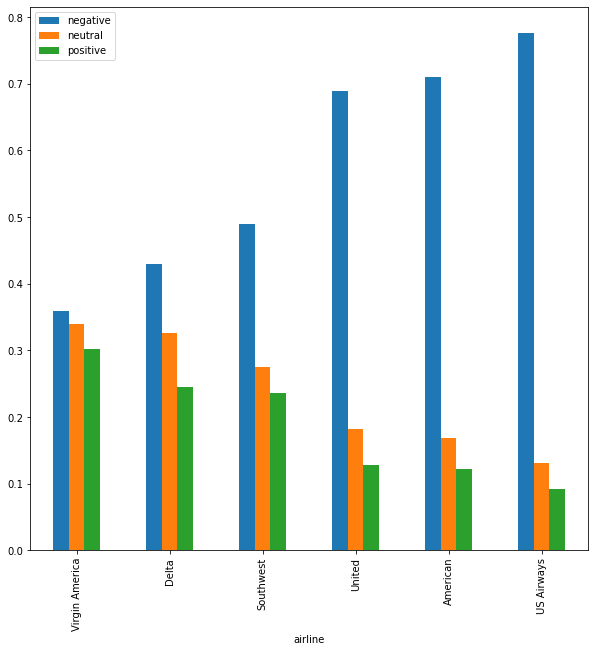

In [3]:
#I will visualize what is the percentage of positive, neutral and negative reviews for each airline company

pivot_airline = df.pivot_table(index=['airline'], columns=['airline_sentiment'], aggfunc=len, margins=True)
print(pivot_airline)

pivot_airline2 = pivot_airline.div(pivot_airline.iloc[:,-1], axis=0 )

pivot_airline2.columns = pivot_airline2.iloc[0]
pivot_airline2.columns = ['negative', 'neutral', 'positive','all']
pivot_airline2= pivot_airline2.drop(['All'],axis=0)
pivot_airline2= pivot_airline2.drop(['all'],axis=1)
pivot_airline2= pivot_airline2.sort_values('negative')
print(pivot_airline2)

pivot_airline_plot = pivot_airline2.plot(kind='bar', figsize=(10,10))

In [4]:
# I assign a numerical value to negative, neutral and positive so that: negative=-1; neutral=0; positive=1

df.loc[df['airline_sentiment'] == 'negative', 'airline_sentiment_numerical'] = -1
df.loc[df['airline_sentiment'] == 'neutral', 'airline_sentiment_numerical'] = 0
df.loc[df['airline_sentiment'] == 'positive', 'airline_sentiment_numerical'] = 1

df['airline_sentiment_numerical']=df['airline_sentiment_numerical'].astype('int64')
print(df)
df.info()
# I save my dataset
df.to_csv("sentimentdatasetflights.csv")

      airline_sentiment         airline  \
0               neutral  Virgin America   
1              positive  Virgin America   
2               neutral  Virgin America   
3              negative  Virgin America   
4              negative  Virgin America   
...                 ...             ...   
14635          positive        American   
14636          negative        American   
14637           neutral        American   
14638          negative        American   
14639           neutral        American   

                                                    text  \
0                    @VirginAmerica What @dhepburn said.   
1      @VirginAmerica plus you've added commercials t...   
2      @VirginAmerica I didn't today... Must mean I n...   
3      @VirginAmerica it's really aggressive to blast...   
4      @VirginAmerica and it's a really big bad thing...   
...                                                  ...   
14635  @AmericanAir thank you we got on a different f...   
146

In [5]:
# Checking for Missing Values
df.isnull().sum()

airline_sentiment              0
airline                        0
text                           0
airline_sentiment_numerical    0
dtype: int64

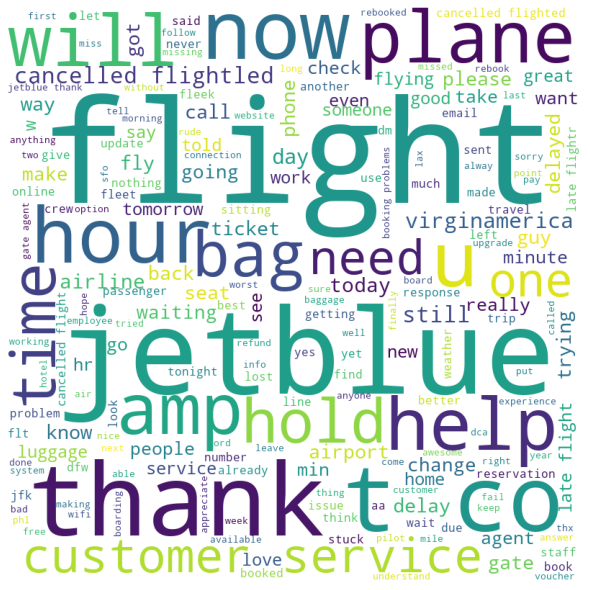

In [6]:
#Visualize most common words with WordCloud

# importing all necessary modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

# Data preparation  
dftext = df.text 
comment_words = '' 
stop_words = ["virgina america", "delta", "southwest", "southwestair", "united", "american", "americanair", "usairway", "usairways"] + list(STOPWORDS) 
  
# iterate through the csv file 
for val in dftext: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

**2)Choosing/testing of algorithm approach**

In [7]:
#PIPELINE: 1)Cleaner  2) Tokenizer/Vectorizer  3) Classifier

In [8]:
#1)CLEANER

# Basic function to clean the text that removes spaces and converts text into lowercase.
def clean_text(text):     
    return text.strip().lower()

#CUSTOM TRANFORMER for removing initial and end spaces and converting text into lower case.
#Here, we will create a custom predictors class wich inherits the TransformerMixin class.
#This class overrides the transform, fit and get_params methods.

from sklearn.base import TransformerMixin

class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}
    


In [9]:
#2)TOKENIZER/VECTORIZER

#BoW converts text into the matrix of occurrence of words within a given document.
#We can generate a BoW matrix for our text data by using scikit-learn‘s CountVectorizer.
#The ngram_range parameter we’ll use in the code below sets the lower and upper bounds of the our ngrams.
#Then we’ll assign the ngrams to bow_vector

# Creating a list of the stopwords(most common words) we want to delete from our dataset in order to remove the noise from
#the data we fit in our model
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)

# Creating a list of the punctuation we want to delete to remove the noise from the data we fit in our model
import string
punctuations = string.punctuation

# Creating a Spacy Parser(it is this parser that tokenizes the strings of text)
from spacy.lang.en import English
parser = English()

# Creating a tokenizer function that use the list of stopwords, the list of punctuation and the Spacy Parser
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens

# Creating a BAG OF WORDS

from sklearn.feature_extraction.text import CountVectorizer
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [10]:
#3)CLASSIFIER

#I select an algorithm(classifier), in this case I decided to test the Linear Support Vector Classifier the Logistic Regression
# and the Random Forest:

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


classifierSVC = LinearSVC()
classifierLOG = LogisticRegression()
classifierRF = RandomForestClassifier()

In [11]:
# Splitting Data Set

from sklearn.model_selection import train_test_split

# Features and Labels

X = df['text']
ylabels = df['airline_sentiment_numerical']

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=42)

In [12]:
# Create the  pipeline to clean, tokenize, vectorize, and classify

from sklearn.pipeline import Pipeline

pipeSVC = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifierSVC)])

pipeLOG = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifierLOG)])

pipeRF = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifierRF)])

In [13]:
# Model generation

pipeSVC.fit(X_train,y_train)

pipeLOG.fit(X_train,y_train)

pipeRF.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x0000028955ACCEB0>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x000002895518A8B0>)),
                ('classifier', RandomForestClassifier())])

In [14]:
# Predicting with a test dataset

sample_predictionSVC = pipeSVC.predict(X_test)
sample_predictionLOG = pipeLOG.predict(X_test)
sample_predictionRF = pipeRF.predict(X_test)

In [15]:
# Model Accuracy

#SVC Metrics
from sklearn import metrics
print("Accuracy of SVC:",metrics.accuracy_score(y_test, sample_predictionSVC))
print("Classification report for classifier %s:\n%s\n"
      % (classifierSVC, metrics.classification_report(y_test, sample_predictionSVC)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, sample_predictionSVC))

confusionmatrixSVC = metrics.confusion_matrix(y_test, sample_predictionSVC)

category0 = confusionmatrixSVC[0].sum()
category1 = confusionmatrixSVC[1].sum()
category2 = confusionmatrixSVC[2].sum()
print("Confusion matrix results:")
print(confusionmatrixSVC[0, 0], " times on ", category0 , " the classifier classified correctly a negative comment") 
print(confusionmatrixSVC[1, 1], " times on " , category1 , " the classifier classified correctly a neutral comment")
print(confusionmatrixSVC[2, 2], " times on " , category2, " the classifier classified correctly a positive comment")

Accuracy of SVC: 0.7810792349726776
Classification report for classifier LinearSVC():
              precision    recall  f1-score   support

          -1       0.86      0.87      0.86      1889
           0       0.57      0.55      0.56       580
           1       0.72      0.71      0.71       459

    accuracy                           0.78      2928
   macro avg       0.72      0.71      0.71      2928
weighted avg       0.78      0.78      0.78      2928


Confusion matrix:
[[1641  181   67]
 [ 200  321   59]
 [  76   58  325]]
Confusion matrix results:
1641  times on  1889  the classifier classified correctly a negative comment
321  times on  580  the classifier classified correctly a neutral comment
325  times on  459  the classifier classified correctly a positive comment


In [16]:
#Model Accuracy

#LOG Metrics
print("Accuracy of LOG:",metrics.accuracy_score(y_test, sample_predictionLOG))
print("Classification report for classifier %s:\n%s\n"
      % (classifierLOG, metrics.classification_report(y_test, sample_predictionLOG)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, sample_predictionLOG))

confusionmatrixLOG = metrics.confusion_matrix(y_test, sample_predictionLOG)

category0 = confusionmatrixLOG[0].sum()
category1 = confusionmatrixLOG[1].sum()
category2 = confusionmatrixLOG[2].sum()
print("Confusion matrix results:")
print(confusionmatrixLOG[0, 0], " times on ", category0 , " the classifier classified correctly a negative comment") 
print(confusionmatrixLOG[1, 1], " times on " , category1 , " the classifier classified correctly a neutral comment")
print(confusionmatrixLOG[2, 2], " times on " , category2, " the classifier classified correctly a positive comment")

Accuracy of LOG: 0.8015710382513661
Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

          -1       0.85      0.90      0.88      1889
           0       0.62      0.56      0.59       580
           1       0.77      0.69      0.73       459

    accuracy                           0.80      2928
   macro avg       0.75      0.72      0.73      2928
weighted avg       0.80      0.80      0.80      2928


Confusion matrix:
[[1701  143   45]
 [ 203  327   50]
 [  86   54  319]]
Confusion matrix results:
1701  times on  1889  the classifier classified correctly a negative comment
327  times on  580  the classifier classified correctly a neutral comment
319  times on  459  the classifier classified correctly a positive comment


In [17]:
#Model Accuracy

#RF Metrics
print("Accuracy of RF:",metrics.accuracy_score(y_test, sample_predictionRF))
print("Classification report for classifier %s:\n%s\n"
      % (classifierRF, metrics.classification_report(y_test, sample_predictionRF)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, sample_predictionRF))

confusionmatrixRF = metrics.confusion_matrix(y_test, sample_predictionRF)

category0 = confusionmatrixRF[0].sum()
category1 = confusionmatrixRF[1].sum()
category2 = confusionmatrixRF[2].sum()
print("Confusion matrix results:")
print(confusionmatrixRF[0, 0], " times on ", category0 , " the classifier classified correctly a negative comment") 
print(confusionmatrixRF[1, 1], " times on " , category1 , " the classifier classified correctly a neutral comment")
print(confusionmatrixRF[2, 2], " times on " , category2, " the classifier classified correctly a positive comment")

Accuracy of RF: 0.7629781420765027
Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

          -1       0.82      0.89      0.85      1889
           0       0.57      0.45      0.50       580
           1       0.70      0.61      0.66       459

    accuracy                           0.76      2928
   macro avg       0.70      0.65      0.67      2928
weighted avg       0.75      0.76      0.75      2928


Confusion matrix:
[[1690  138   61]
 [ 259  262   59]
 [ 117   60  282]]
Confusion matrix results:
1690  times on  1889  the classifier classified correctly a negative comment
262  times on  580  the classifier classified correctly a neutral comment
282  times on  459  the classifier classified correctly a positive comment


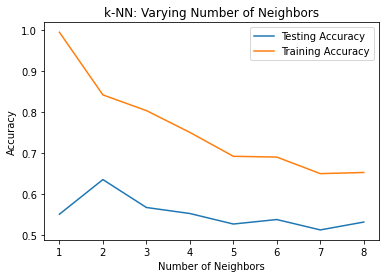

In [18]:
#Trying a 4th classifier:KNeighboors Classifier
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    classifierKNN = KNeighborsClassifier(n_neighbors=k)
    
    pipeKNN = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifierKNN)])

    # Fit the classifier to the training data
    pipeKNN.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = pipeKNN.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = pipeKNN.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [19]:
#Managing to rebalance the dataset cause the accuracy is too low for the second and third class

In [20]:
#Trying to use SMOTE to oversample the minority classes
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline


pipeLOGsmote = make_pipeline(predictors(), bow_vector, SMOTE(random_state=42), classifierLOG)


pipeLOGsmote.fit(X_train, np.array(y_train))

sample_predictionLOGsmote = pipeLOGsmote.predict(X_test)

print("Accuracy of LOG smote:",metrics.accuracy_score(y_test, sample_predictionLOGsmote))
print("Classification report for classifier %s:\n%s\n"
      % (classifierLOG, metrics.classification_report(y_test, sample_predictionLOGsmote)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, sample_predictionLOGsmote))

confusionmatrixLOGsmote = metrics.confusion_matrix(y_test, sample_predictionLOGsmote)

category0 = confusionmatrixLOGsmote[0].sum()
category1 = confusionmatrixLOGsmote[1].sum()
category2 = confusionmatrixLOGsmote[2].sum()
print("Confusion matrix results:")
print(confusionmatrixLOGsmote[0, 0], " times on ", category0 , " the classifier classified correctly a negative comment") 
print(confusionmatrixLOGsmote[1, 1], " times on " , category1 , " the classifier classified correctly a neutral comment")
print(confusionmatrixLOGsmote[2, 2], " times on " , category2, " the classifier classified correctly a positive comment")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LOG smote: 0.7711748633879781
Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

          -1       0.88      0.83      0.86      1889
           0       0.55      0.60      0.57       580
           1       0.67      0.73      0.70       459

    accuracy                           0.77      2928
   macro avg       0.70      0.72      0.71      2928
weighted avg       0.78      0.77      0.78      2928


Confusion matrix:
[[1572  236   81]
 [ 145  350   85]
 [  70   53  336]]
Confusion matrix results:
1572  times on  1889  the classifier classified correctly a negative comment
350  times on  580  the classifier classified correctly a neutral comment
336  times on  459  the classifier classified correctly a positive comment


In [21]:
#Trying to use RandomOverSampler to oversample the minority classes

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
oversample = RandomOverSampler(sampling_strategy='minority',random_state=42)

pipeLOGoversampling = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('sampling', oversample),
                 ('classifier', classifierLOG)])

pipeLOGoversampling.fit(X_train,y_train)

sample_predictionLOGoversampling = pipeLOGoversampling.predict(X_test)


print("Accuracy of LOG oversampling:",metrics.accuracy_score(y_test, sample_predictionLOGoversampling))
print("Classification report for classifier %s:\n%s\n"
      % (classifierLOG, metrics.classification_report(y_test, sample_predictionLOGoversampling)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, sample_predictionLOGoversampling))

confusionmatrixLOGoversampling = metrics.confusion_matrix(y_test, sample_predictionLOGoversampling)

category0 = confusionmatrixLOGoversampling[0].sum()
category1 = confusionmatrixLOGoversampling[1].sum()
category2 = confusionmatrixLOGoversampling[2].sum()
print("Confusion matrix results:")
print(confusionmatrixLOGoversampling[0, 0], " times on ", category0 , " the classifier classified correctly a negative comment") 
print(confusionmatrixLOGoversampling[1, 1], " times on " , category1 , " the classifier classified correctly a neutral comment")
print(confusionmatrixLOGoversampling[2, 2], " times on " , category2, " the classifier classified correctly a positive comment")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LOG oversampling: 0.7954234972677595
Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

          -1       0.87      0.88      0.87      1889
           0       0.65      0.52      0.58       580
           1       0.67      0.79      0.73       459

    accuracy                           0.80      2928
   macro avg       0.73      0.73      0.73      2928
weighted avg       0.79      0.80      0.79      2928


Confusion matrix:
[[1664  134   91]
 [ 189  301   90]
 [  65   30  364]]
Confusion matrix results:
1664  times on  1889  the classifier classified correctly a negative comment
301  times on  580  the classifier classified correctly a neutral comment
364  times on  459  the classifier classified correctly a positive comment


In [22]:
#Stratified sampling

#Look at the proportions train/test in each different class of the previous split
train_minus1, train_0, train_1 = len(y_train[y_train==-1]), len(y_train[y_train==0]), len(y_train[y_train==1])
test_minus1, test_0, test_1 = len(y_test[y_test==-1]), len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: -1=%d, 0=%d, 1=%d, Test: -1=%d, 0=%d, 1=%d' % (train_minus1, train_0, train_1, test_minus1, test_0, test_1))

#Doing another train/test split with fixed proportions in each class

X_trainS, X_testS, y_trainS, y_testS = train_test_split(X, ylabels, test_size=0.2, random_state=42, stratify=ylabels)


pipeLOG.fit(X_trainS,y_trainS)

sample_predictionLOGStratified = pipeLOG.predict(X_testS)

#Metrics

print("Accuracy of LOG Stratified:",metrics.accuracy_score(y_testS, sample_predictionLOGStratified))
print("Classification report for classifier %s:\n%s\n"
      % (classifierLOG, metrics.classification_report(y_testS, sample_predictionLOGStratified)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_testS, sample_predictionLOGStratified))

confusionmatrixLOGStratified = metrics.confusion_matrix(y_testS, sample_predictionLOGStratified)

category0 = confusionmatrixLOGStratified[0].sum()
category1 = confusionmatrixLOGStratified[1].sum()
category2 = confusionmatrixLOGStratified[2].sum()
print("Confusion matrix results:")
print(confusionmatrixLOGStratified[0, 0], " times on ", category0 , " the classifier classified correctly a negative comment") 
print(confusionmatrixLOGStratified[1, 1], " times on " , category1 , " the classifier classified correctly a neutral comment")
print(confusionmatrixLOGStratified[2, 2], " times on " , category2, " the classifier classified correctly a positive comment")

>Train: -1=7289, 0=2519, 1=1904, Test: -1=1889, 0=580, 1=459


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LOG Stratified: 0.7841530054644809
Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

          -1       0.84      0.89      0.87      1836
           0       0.61      0.57      0.59       620
           1       0.76      0.64      0.69       472

    accuracy                           0.78      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.78      0.78      0.78      2928


Confusion matrix:
[[1642  144   50]
 [ 223  354   43]
 [  92   80  300]]
Confusion matrix results:
1642  times on  1836  the classifier classified correctly a negative comment
354  times on  620  the classifier classified correctly a neutral comment
300  times on  472  the classifier classified correctly a positive comment


In [23]:
# CHOICE OF THE ALGORITHM
print("After the evaluation of the metrics of the different models I decided to use as classifier the LOG classifier because of its higer accuracy, even though I tryed to increase the performance of the model with the classes neutral and negative with various techniques, I did not achieved any remarkable result, then I will choose for a random train test split with 0.2 samples used for testing")

After the evaluation of the metrics of the different models I decided to use as classifier the LOG classifier because of its higer accuracy, even though I tryed to increase the performance of the model with the classes neutral and negative with various techniques, I did not achieved any remarkable result, then I will choose for a random train test split with 0.2 samples used for testing


**3) Visualizing the results**

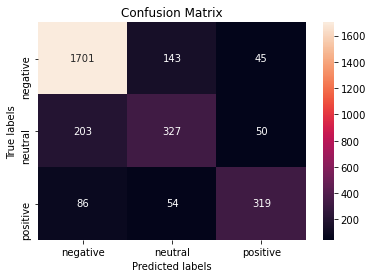

In [31]:
#Heat map for the confusion matrix of the chosen algorithm/model

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusionmatrixLOG, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative','neutral', 'positive']); ax.yaxis.set_ticklabels(['negative','neutral', 'positive']);

In [ ]:
#Testing the model writing random sentences
Random_sentences= ("This flight was very bad","The flight was not above my expectations and neither below","I really enjoyed the flight")
sample_predictionLOG = pipeLOG.predict(Random_sentences)
print(sample_predictionLOG)
print("The model works very well with negative comments while its efficiency in predicting negative and neutral comments could be better")